## Assignment 1

#### Bitcoin Historical Data

https://github.com/amoghchakkarwar/Big-Data-Systems-and-Intelligence-Analytics

##### Introduction
Bitcoin has recently attracted considerable attention in the fields of economics, cryptography, and computer science due to its inherent nature of combining encryption technology and monetary units. Bitcoin is a cryptocurrency and worldwide payment system. It is the first decentralized digital currency, as the system works without a central bank or single administrator. The network is peer-to-peer and transactions take place between users directly, without an intermediary. These transactions are verified by network nodes through the use of cryptography and recorded in a public distributed ledger called a blockchain. Bitcoin was invented by an unknown person or group of people under the name Satoshi Nakamoto and released as open-source software in 2009. Due to it's popularity more people want to invest in Bitcoins but they hesistate because lack of knowledge. To make it easy for the people to invest in bitcoin I want to predict Bitcoin prices using machine learning algorithm.

##### Background Work
The Bitcoin data doesn't have any independant variables, so the way to predict prices is through timeseries, as the data is minute by minute with Unix time stamp. Using RNN the Output of 1st recurence is given as input of 2nd. And using this the model is trained and the price is predicted.

##### Data Source
The Dataset I am using for this prediction is taken from Kaggel.com "Bitcoin Historical Data". It has around 1.5 Million records with minute by minute values. CSV files for select bitcoin exchanges for the time period of Dec 2014 to Jan 2018, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. 

##### Algorithm and Code Source
I am implementing RNN (Recurrent Neural Network) using TensorFlow to predict the price of bitcoin using the dataset from Coinbase a Bitcoin company. I have refered the code from Kaggle.com and tried to test the prediction by changing the parameters.

In [1]:
#importing required packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import os

In [2]:
# read in the data

df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')

In [39]:
#Display top 10 records
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
5,1417412280,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
6,1417412340,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
8,1417412460,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
9,1417412520,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01


In [5]:
#Check for missing values
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

There are no missing values as null values are 0.

In [6]:
#to check total number of NaNs
df.isnull().sum().sum()

0

In [7]:
#to print rows having Nans
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [Timestamp, Open, High, Low, Close, Volume_(BTC), Volume_(Currency), Weighted_Price]
Index: []


In [9]:
#Check data types of the df
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [10]:
print(df)

          Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1417411980    300.00    300.00    300.00    300.00      0.010000   
1        1417412040    300.00    300.00    300.00    300.00      0.010000   
2        1417412100    300.00    300.00    300.00    300.00      0.010000   
3        1417412160    300.00    300.00    300.00    300.00      0.010000   
4        1417412220    300.00    300.00    300.00    300.00      0.010000   
5        1417412280    300.00    300.00    300.00    300.00      0.010000   
6        1417412340    300.00    300.00    300.00    300.00      0.010000   
7        1417412400    300.00    300.00    300.00    300.00      0.010000   
8        1417412460    300.00    300.00    300.00    300.00      0.010000   
9        1417412520    300.00    300.00    300.00    300.00      0.010000   
10       1417412580    300.00    300.00    300.00    300.00      0.010000   
11       1417412640    300.00    300.00    300.00    300.00      0.010000   

In [12]:
#Summary statistics
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06,1.574274e+06
mean,1.468131e+09,1.705118e+03,1.706025e+03,1.704113e+03,1.705123e+03,7.073412e+00,2.267928e+04,1.705069e+03
std,2.728500e+07,3.059038e+03,3.061434e+03,3.056505e+03,3.059105e+03,1.698569e+01,1.225156e+05,3.058976e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.444527e+09,2.903000e+02,2.904100e+02,2.901800e+02,2.903000e+02,6.915000e-01,3.162361e+02,2.903031e+02
50%,1.468141e+09,5.900500e+02,5.902100e+02,5.899800e+02,5.900200e+02,2.381500e+00,1.398624e+03,5.900207e+02
75%,1.491756e+09,1.224490e+03,1.224810e+03,1.224090e+03,1.224490e+03,7.032457e+00,7.601787e+03,1.224453e+03
max,1.515370e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


There is no bad data as all the data is numeric and satisfies the range.

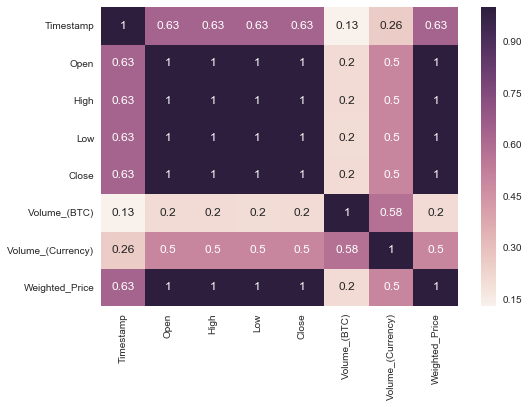

In [13]:
#Correlation between columns
corr=df.corr()
sns.heatmap(corr,annot=True)

1. The Weighte_price is fully correlated with the OHLC as the Weighted_Price is calculated from OHLC and is per minute so there is no such variation between prices.
2. Valume_(Currency) re correlated with OHLC and Volume(BTC) by 0.5 and 0.58 respectively as the Vaolume_(Currency) is multiplication of OHLC and Volume_(BTC)

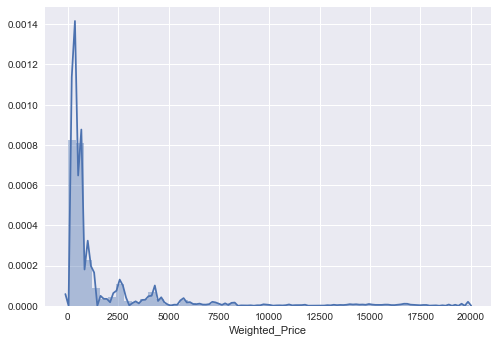

In [14]:
sns.distplot(df['Weighted_Price'])

Maximum density of Weighted_Price lies between 0 to 5000 USD

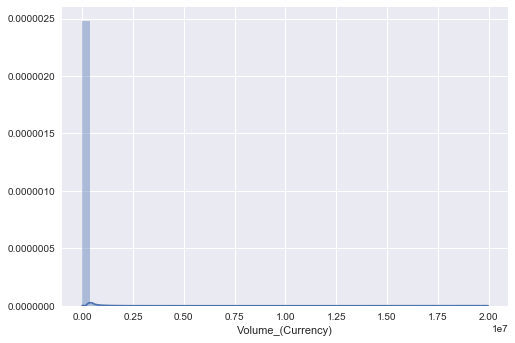

In [15]:
sns.distplot(df['Volume_(Currency)'])

Maximum density of Valume_(BTC) lies in 0 to 500 BTC

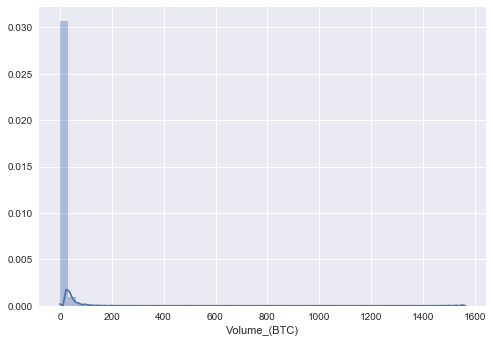

In [16]:
sns.distplot(df['Volume_(BTC)'])

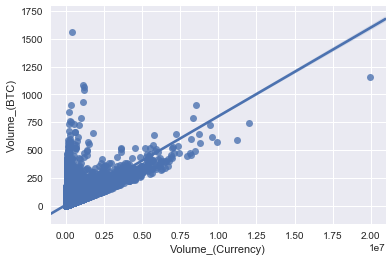

In [80]:
#sns.regplot(x="Volume_(Currency)", y="Volume_(BTC)", data=df)

There seems to be 3 Outliers in the above regression plot but those values are significant as the Volume_BTC increases the Volume_Currency increases. Those seem like outliers are there because they have exceptionaly high volume_BTC and Weighted_Price.
This is shown in below conditions.

In [17]:
df['Volume_(Currency)'].max()

19970764.734999999

In [19]:
df.loc[df['Volume_(BTC)'] > 1000]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
22835,1422283320,288.33,288.33,241.43,241.43,1563.267113,4.134119e+05,264.453790
1132891,1488886680,1227.43,1227.43,1050.00,1212.18,1068.447205,1.212577e+06,1134.896141
1137776,1489179780,1224.98,1225.00,1085.00,1085.00,1041.413142,1.189129e+06,1141.842040
1137777,1489179840,1095.78,1120.00,978.94,1045.44,1086.129870,1.117013e+06,1028.434193
1539864,1513305060,17250.00,17450.00,17249.99,17450.00,1156.319405,1.997076e+07,17270.976044


In [20]:
df.loc[df['Volume_(Currency)'] > 10000000]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1529936,1512709380,16079.05,16079.06,16000.00,16000.0,745.968591,1.198348e+07,16064.322709
1539864,1513305060,17250.00,17450.00,17249.99,17450.0,1156.319405,1.997076e+07,17270.976044
1542312,1513451940,18999.97,19101.00,18999.97,19101.0,591.546747,1.125061e+07,19018.975789


#### Summery of EDA
The data is densly populated in the lower left corner as the volume currency depends on OHLC and Volume_BTC and transactions are in perticular range.

In [32]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [33]:
# split data
prediction_days = 10
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [34]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [35]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
1090/1090 [==============================] - 2s 1ms/step - loss: 0.0715
Epoch 2/100
1090/1090 [==============================] - 0s 418us/step - loss: 0.0187
Epoch 3/100
1090/1090 [==============================] - 0s 406us/step - loss: 0.0166
Epoch 4/100
1090/1090 [==============================] - 0s 440us/step - loss: 0.0154
Epoch 5/100
1090/1090 [==============================] - 0s 416us/step - loss: 0.0142
Epoch 6/100
1090/1090 [==============================] - 0s 360us/step - loss: 0.0131
Epoch 7/100
1090/1090 [==============================] - 0s 361us/step - loss: 0.0119
Epoch 8/100
1090/1090 [==============================] - 0s 433us/step - loss: 0.0107
Epoch 9/100
1090/1090 [==============================] - 0s 428us/step - loss: 0.0095
Epoch 10/100
1090/1090 [==============================] - 0s 428us/step - loss: 0.0083
Epoch 11/100
1090/1090 [==============================] - 0s 439us/step - loss: 0.0071
Epoch 12/100
1090/1090 [==============================

1090/1090 [==============================] - 0s 382us/step - loss: 1.0145e-04
Epoch 92/100
1090/1090 [==============================] - 1s 501us/step - loss: 1.0057e-04
Epoch 93/100
1090/1090 [==============================] - 1s 557us/step - loss: 9.9259e-05
Epoch 94/100
1090/1090 [==============================] - 0s 428us/step - loss: 9.8355e-05
Epoch 95/100
1090/1090 [==============================] - 0s 403us/step - loss: 1.0075e-04
Epoch 96/100
1090/1090 [==============================] - 0s 412us/step - loss: 1.0048e-04
Epoch 97/100
1090/1090 [==============================] - 0s 419us/step - loss: 1.0446e-04
Epoch 98/100
1090/1090 [==============================] - 0s 418us/step - loss: 9.7868e-05
Epoch 99/100
1090/1090 [==============================] - 0s 451us/step - loss: 9.8285e-05
Epoch 100/100
1090/1090 [==============================] - 0s 442us/step - loss: 9.6245e-05


In [36]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [37]:
print(test_set)

[ 13584.14207723  13386.49771138  13425.05417801  13897.40957171
  14989.9393498   14851.47788038  15796.59696844  16661.98824725
  16526.9735835   16174.220219  ]


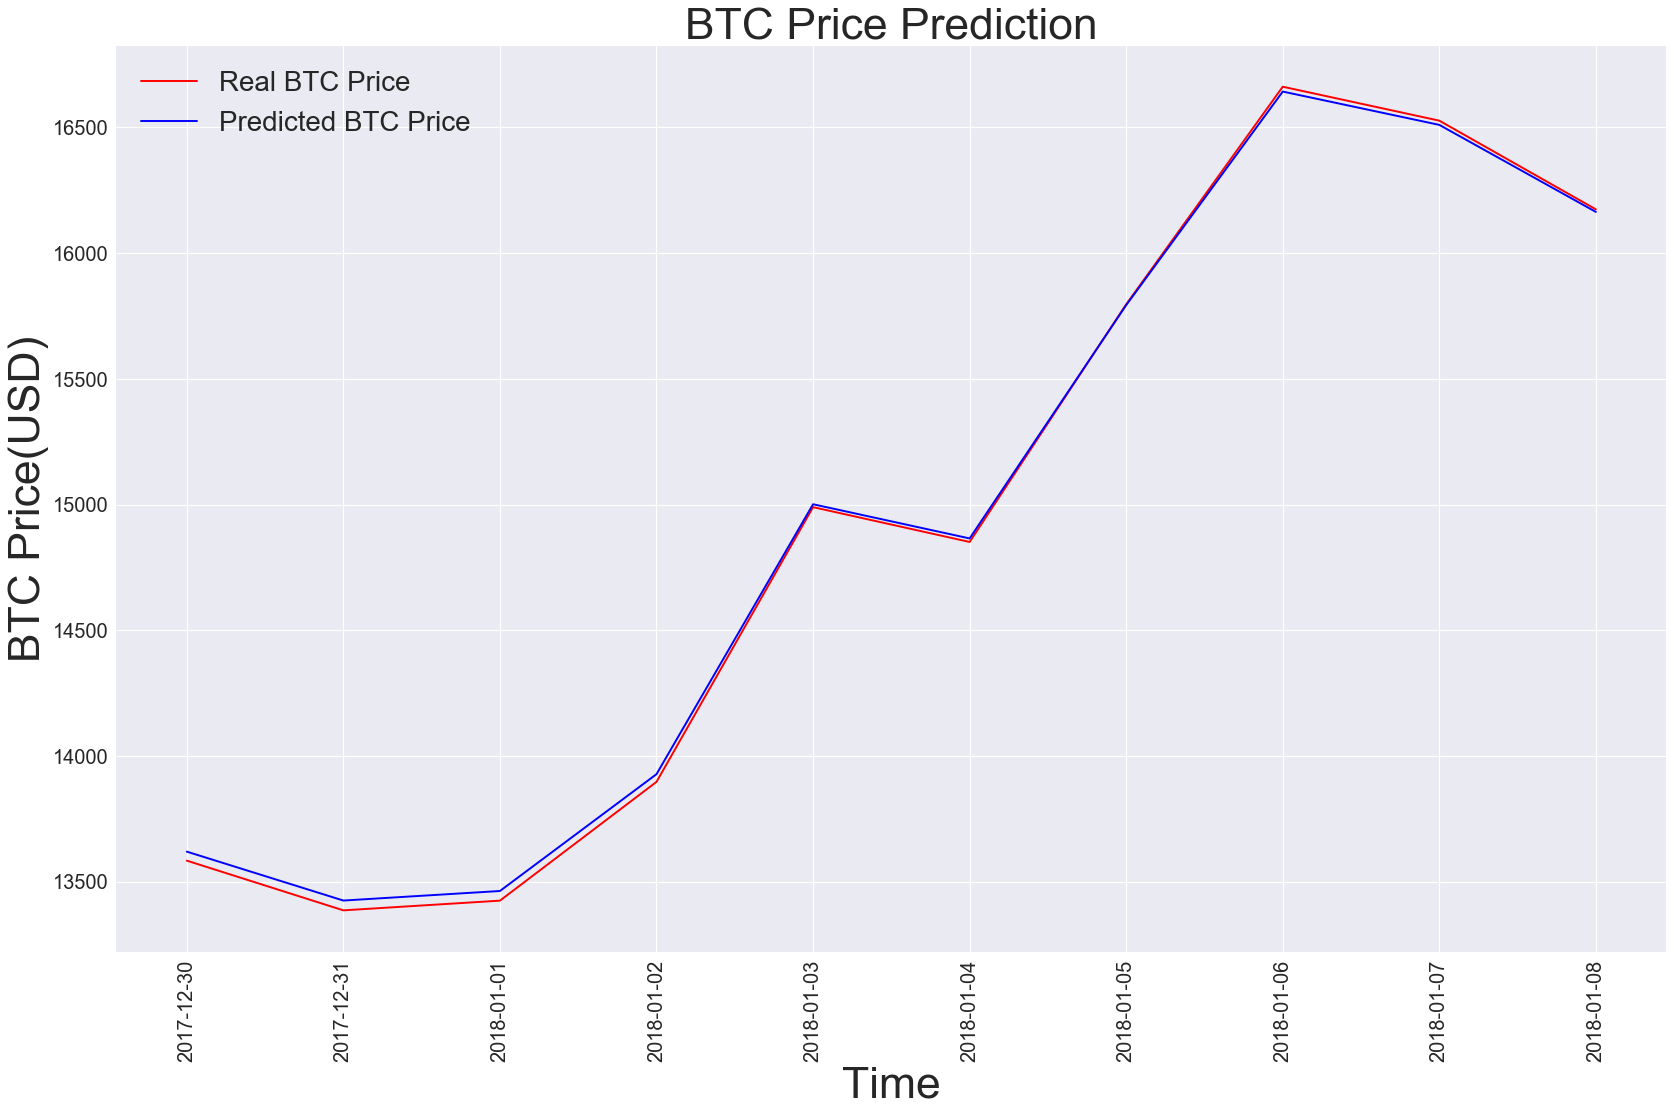

In [38]:
# Visualization
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

#### Analysis
The results show that, as the difference between predicted price and actual price is greater when time is further to the training set. This might be happening because the price of Bitcoin is changing exponentially in recent times and the RNN can’t keep up with the sudden changes in the price over the long duration. Running RNN multiple time changing the output as model gets over fitted.

##### References
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
- https://www.kaggle.com/mczielinski/bitcoin-historical-data